# Import Library

In [82]:
# data manipulation
import pandas as pd
import numpy as np
import ast


# data viz
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load Data

In [83]:
# load data
df = pd.read_csv('job_data.csv')

# check
df.head()

,job_title,company_name,location,job_description,job_link,skills
0,system analyst,tog indonesia,yogyakarta,"responsibilities deploy, maintain, and trouble...",https://www.linkedin.com/jobs/view/4076765593/...,"['statistics', 'communication']"
1,data analyst,tukr,jakarta,tukr is a rapidly expanding renewable commodit...,https://www.linkedin.com/jobs/view/4080741810/...,['erp']
2,supply chain supervisor,seven retail group,jakarta,job responsibility: create the company's suppl...,https://www.linkedin.com/jobs/view/4089476927/...,"['project management', 'problem solving']"
3,data scientist,provenir,jakarta,who we are provenir is a global fintech compa...,https://www.linkedin.com/jobs/view/4076157340/...,"['python', 'machine learning', 'scikit-learn',..."
4,head of product (data),htc global services,jakarta,formal education and work experience : bachelo...,https://www.linkedin.com/jobs/view/4099353940/...,"['kanban', 'communication', 'collaboration']"


# Exploratory Data Analysis

## Top 5 Job Title

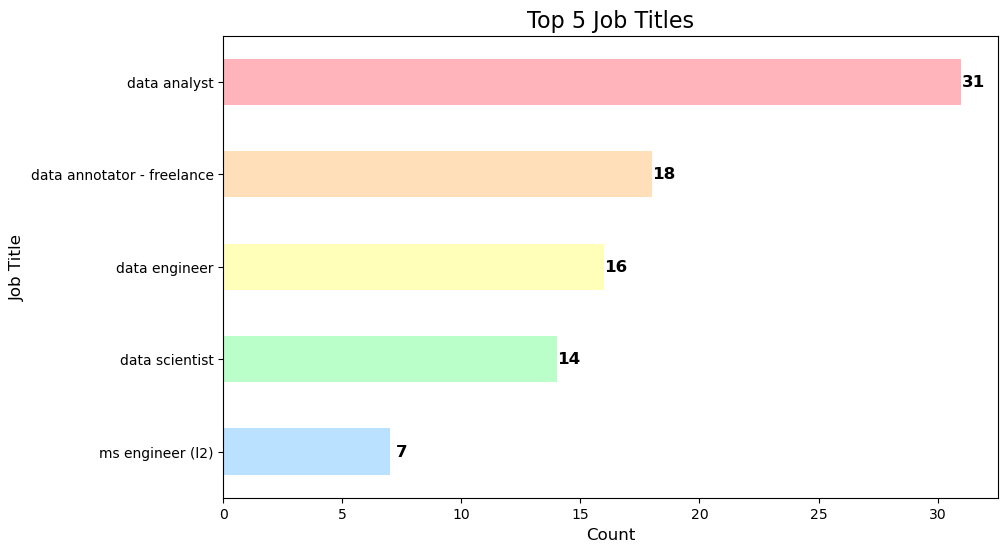

In [84]:
# Get the top 5 companies by job count
top_5_job_titles = df['job_title'].value_counts().head()

# Sort the job titles by count in descending order
top_5_job_titles = top_5_job_titles.sort_values()

# Plot the top 5 job titles as a horizontal bar chart
plt.figure(figsize=(10, 6))
ax = top_5_job_titles.plot(kind='barh', color=['#bae1ff', '#baffc9', '#ffffba', '#ffdfba', '#ffb3ba'])

# Add title and labels
plt.title('Top 5 Job Titles', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job Title', fontsize=12)

# Add annotation
for i in ax.patches:
    plt.text(i.get_width() + 0.5, i.get_y() + i.get_height() / 2, str(int(i.get_width())),
             fontsize=12, fontweight='bold', ha='center', va='center')

# Show plot
plt.show()


**Dominasi Data Analyst**:
- Data Analyst mendominasi dengan selisih yang signifikan dibandingkan job title lainnya. Ini menunjukkan bahwa permintaan untuk Data Analyst sangat tinggi di pasar kerja saat ini.

**Peluang Lowongan di bidang Data**:
- Selain Data Analyst, posisi seperti Data Annotator, Data Engineer, dan Data Scientist juga cukup tinggi. Ini menunjukkan bahwa industri yang berkaitan dengan data, seperti analisis dan rekayasa data, sedang berkembang pesat.

**Peluang Freelance**:
- Ada peluang yang signifikan untuk pekerjaan freelance dalam industri ini. Perusahaan mungkin mencari fleksibilitas dengan mengontrak tenaga kerja freelance untuk proyek-proyek tertentu.

## Top 5 Locations With The Most Job Openings

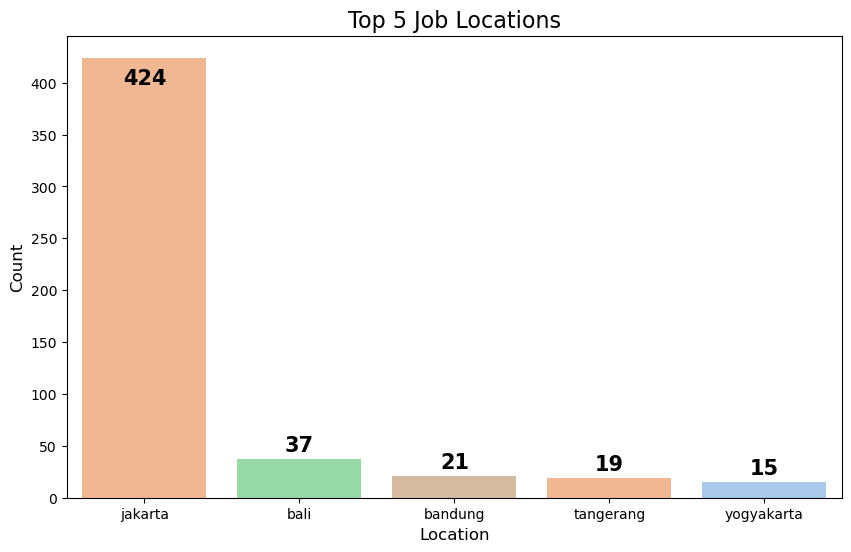

In [105]:
top_5_location = df['location'].value_counts().head()

plt.figure(figsize=(10, 6)) 
ax=sns.countplot(data=df, x='location', order=top_5_location.index, palette='pastel',hue='location') 
plt.title('Top 5 Job Locations',fontsize=16) 
plt.xlabel('Location',fontsize=12)
plt.ylabel('Count',fontsize=12)

for p in ax.patches: 
    height = p.get_height() 
    if height > 350:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                fontsize=15, fontweight='bold',ha='center', va='center', 
                xytext=(0,-15), textcoords='offset points')
    else:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                fontsize=15, fontweight='bold',ha='center', va='center', 
                xytext=(0,10), textcoords='offset points')
    
plt.show()

**Lowongan Pekerjaan**:
- Jakarta memiliki jumlah peluang kerja yang jauh lebih tinggi dibandingkan dengan kota-kota lainnya. Hal ini dikarenakan Jakarta walaupun sudah bukan sebagai ibu kota Indonesia, masih menjadi [pusat bisnis dan pemerintahan](https://m.beritajakarta.id/en/read/43425/fithra-faisal-jakarta-remains-as-business-and-economic-center), sehingga banyak perusahaan besar dan kantor pemerintahan yang berlokasi di sana.
- Kota-kota seperti Bali, Bandung, Tangerang, dan Yogyakarta menunjukkan jumlah peluang kerja yang jauh lebih rendah, meskipun kota-kota ini juga memiliki daya tarik dan sektor industri masing-masing. Bali, misalnya, terkenal dengan sektor pariwisatanya, sedangkan Bandung dikenal dengan industri kreatif dan Tangerang sebagai kota satelit yang berkembang pesat.

### Most Openings Job In Top 5 Location

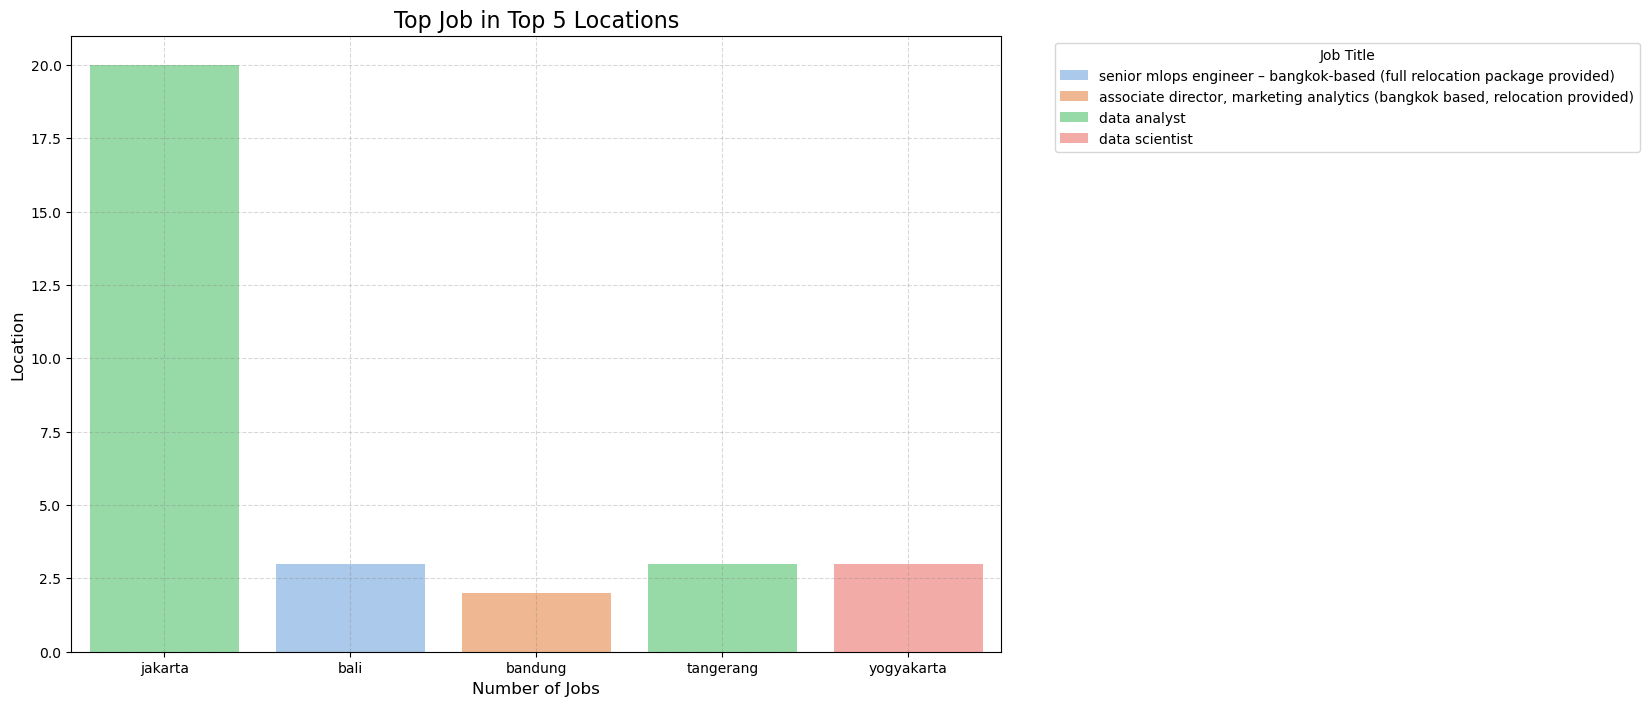

In [86]:

# Mengelompokkan data berdasarkan 'location' dan menghitung jumlah lowongan
location_counts = df.groupby('location').size().reset_index(name='counts')

# Mendapatkan top 5 lokasi dengan lowongan pekerjaan terbanyak
top_5_locations = location_counts.nlargest(5, 'counts')

# Filter DataFrame asli untuk hanya menyertakan top 5 lokasi
filtered_df = df[df['location'].isin(top_5_locations['location'])]

# Mengelompokkan data berdasarkan 'location' dan 'job_title' lalu menghitung jumlah lowongan
job_counts_per_location = filtered_df.groupby(['location', 'job_title']).size().reset_index(name='job_counts')

# Mendapatkan pekerjaan paling banyak di setiap top 5 lokasi
top_jobs_per_location = job_counts_per_location.loc[job_counts_per_location.groupby('location')['job_counts'].idxmax()]

# Buat visualisasi
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='job_counts', x='location', hue='job_title', data=top_jobs_per_location,order=top_5_location.index, palette='pastel')
plt.title('Top Job in Top 5 Locations',fontsize=16)
plt.xlabel('Number of Jobs',fontsize=12)
plt.ylabel('Location',fontsize=12)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)

plt.show()

**Dominasi Data Analyst**:
- Data Analyst mendominasi lowongan pekerjaan di dua dari lima lokasi teratas (Jakarta dan Tangerang). Ini menunjukkan permintaan yang tinggi untuk keahlian dalam analisis data di kota-kota besar yang merupaka pusat bisnis.

**Ketidak Seimbanngan Lowongan Per Daerah**:<br>
Jumlah lowongan di Bali, Bandung, dan Yogyakarta memang jauh lebih sedikit dibandingkan dengan Jakarta dan Tangerang. Hal tersebut mungkin disebabkan oleh beberapa hal:
1. Jakarta dan Tangerang sebagai pusat ekonomi utama memiliki lebih banyak perusahaan yang membuka lowongan pekerjaan, sehingga jumlah lowongan di sana lebih tinggi.
2. Bali, Bandung, dan Yogyakarta memiliki industri yang masih berkembang atau spesialisasi yang berbeda. Misalnya, Bali lebih banyak fokus pada sektor pariwisata, sedangkan Bandung dan Yogyakarta pada industri kreatif.

## Top 5 Openings Job In Jabodetabek

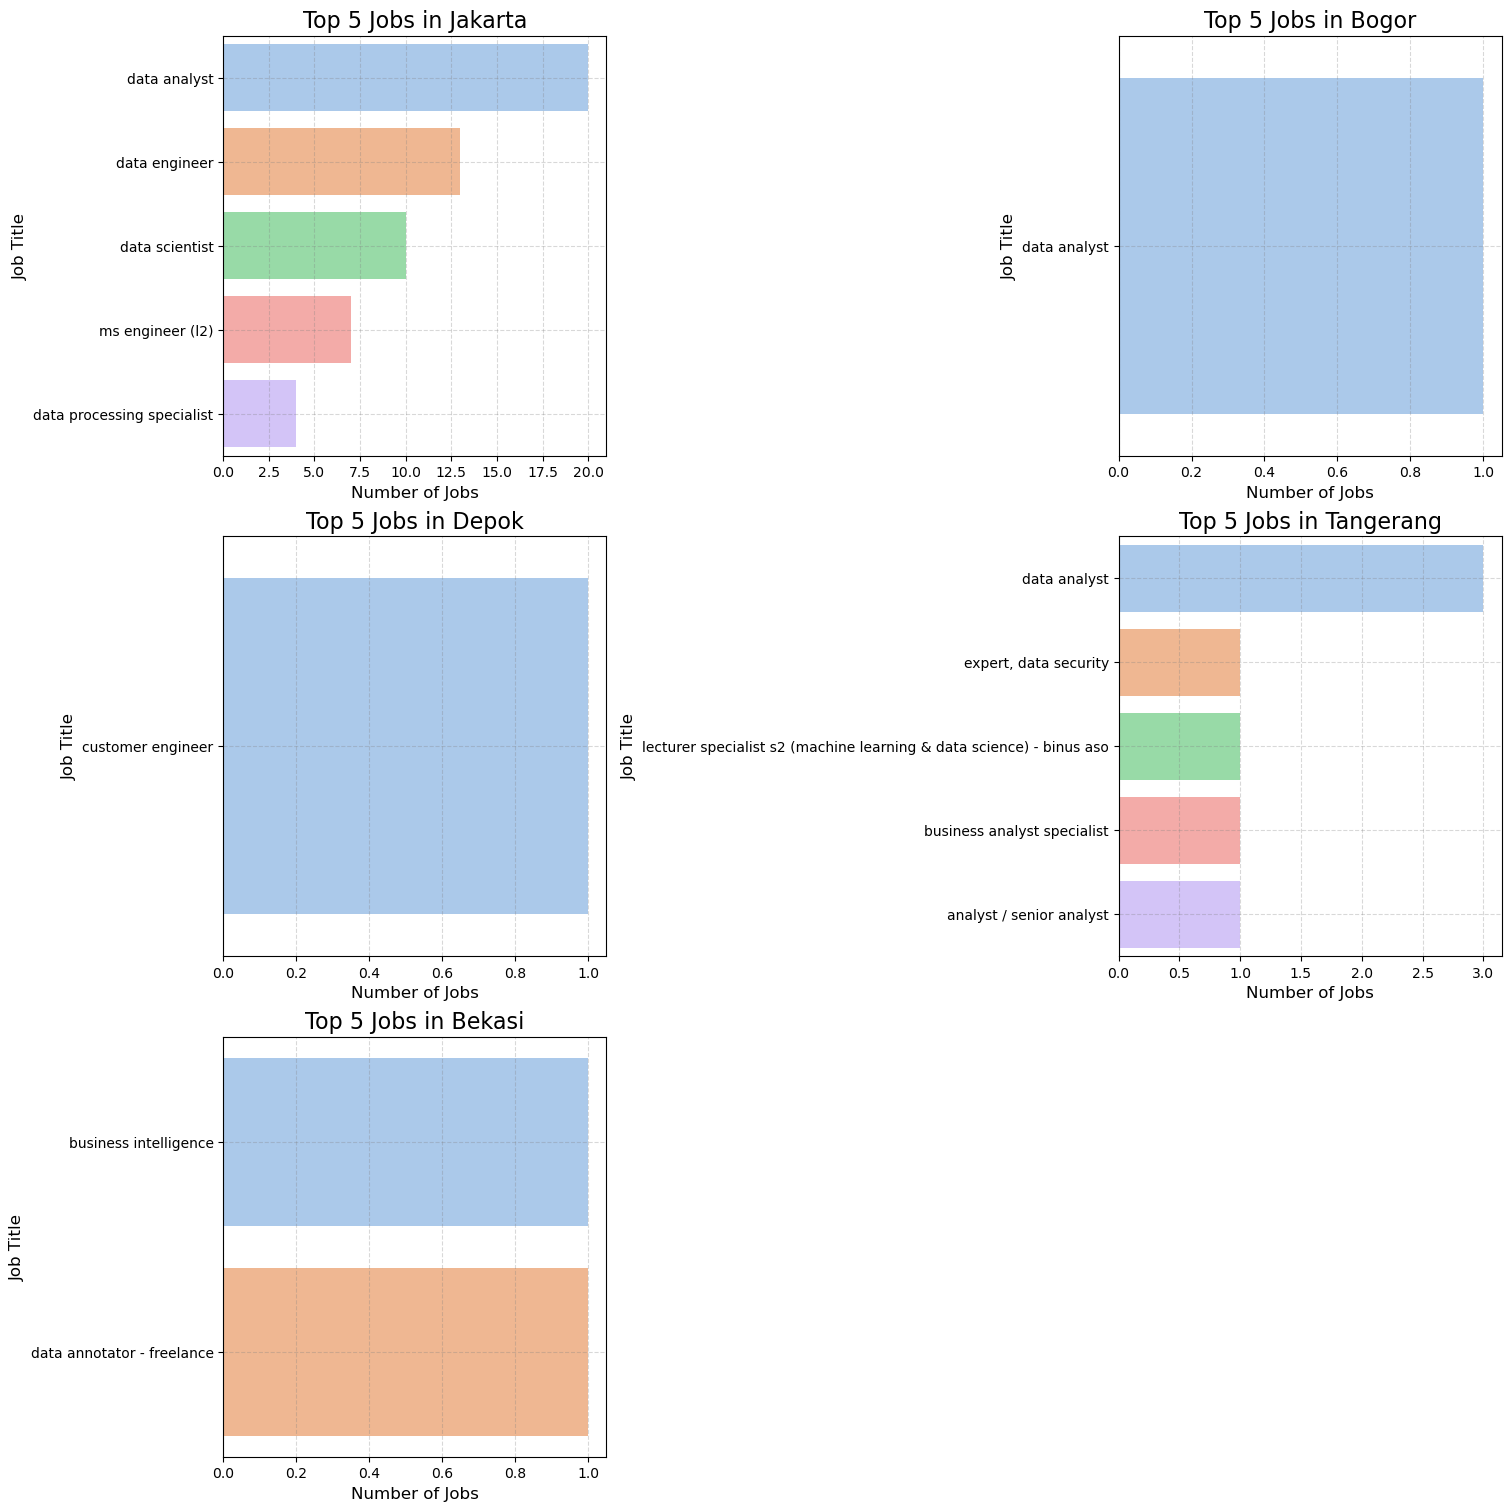

In [87]:
# Fungsi untuk mendapatkan top 5 pekerjaan di wilayah tertentu
def get_top_jobs_in_city(city_name, df, top_n=5):
    city_df = df[df['location'].str.contains(city_name, case=False, na=False)]
    top_jobs = city_df['job_title'].value_counts().head(top_n)
    return top_jobs

# Dapatkan top 5 pekerjaan di setiap wilayah
top_jobs_jakarta = get_top_jobs_in_city('jakarta', df)
top_jobs_bogor = get_top_jobs_in_city('bogor', df)
top_jobs_depok = get_top_jobs_in_city('depok', df)
top_jobs_tangerang = get_top_jobs_in_city('tangerang', df)
top_jobs_bekasi = get_top_jobs_in_city('bekasi', df)

# Buat subplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), constrained_layout=True)

# Daftar kota dan data pekerjaan
cities_and_jobs = [
    ('Jakarta', top_jobs_jakarta),
    ('Bogor', top_jobs_bogor),
    ('Depok', top_jobs_depok),
    ('Tangerang', top_jobs_tangerang),
    ('Bekasi', top_jobs_bekasi)
]

# Plot setiap top job di subplot
for ax, (city_name, top_jobs) in zip(axes.flatten(), cities_and_jobs):
    sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='pastel', hue=top_jobs.index, ax=ax)
    ax.set_title(f'Top 5 Jobs in {city_name.capitalize()}', fontsize=16)
    ax.set_xlabel('Number of Jobs', fontsize=12)
    ax.set_ylabel('Job Title', fontsize=12)
    ax.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)


# Matikan axis kosong
for ax in axes.flatten()[len(cities_and_jobs):]:
    ax.axis('off')

plt.show()

[Jabodetabek](https://kompaspedia.kompas.id/baca/paparan-topik/jabodetabek-konsep-sejarah-dan-relasi-wilayah-aglomerasi) merupakan kawasan metropolitan Jakarta dan sekitarnya yang memiliki jalinan interaksi sosial-ekonomi dan jarak spasial sehingga kemungkinan banyak lowongan pekerjaan yang tersebar di sana.

**Konsentrasi di Jakarta**:
- Jumlah lowongan pekerjaan yang jauh lebih banyak di Jakarta menunjukkan bahwa mantan ibu kota masih menjadi pusat utama untuk pekerjaan di bidang teknologi dan analitik data.

**Perbedaan Permintaan**: 
- Ada perbedaan signifikan dalam jumlah lowongan pekerjaan di kota-kota lain seperti Bogor, Depok, Tangerang, dan Bekasi dibandingkan dengan Jakarta. Ini menunjukkan konsentrasi perusahaan besar di Jakarta dan kebutuhan untuk mempertimbangkan lokasi kerja bagi pencari kerja.

## Top 7 Companies

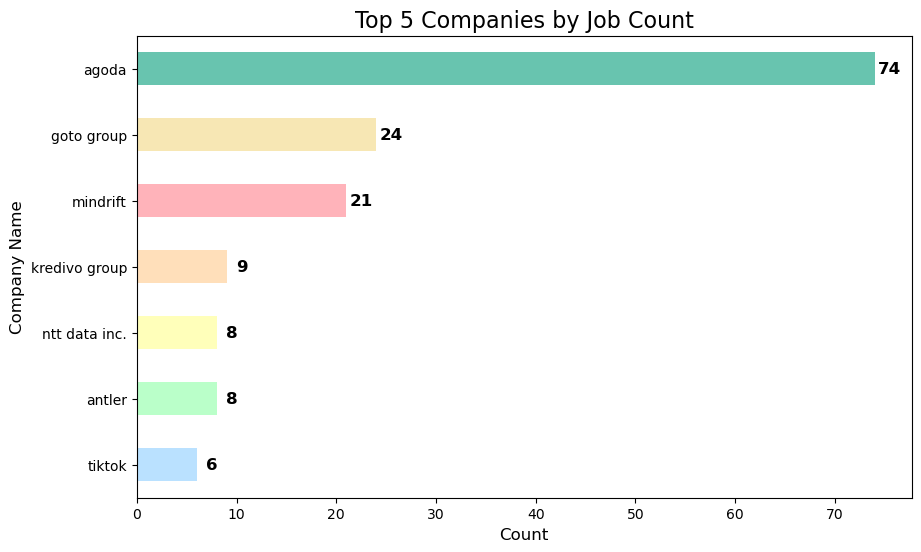

In [108]:
# Get the top 5 companies by job count
top_5_companies = df['company_name'].value_counts().head(7)

# Sort the job titles by count in descending order
top_5_companies = top_5_companies.sort_values()

# Plot the top 5 companies as a horizontal bar chart
plt.figure(figsize=(10, 6))
ax=top_5_companies.plot(kind='barh', color=['#bae1ff', '#baffc9', '#ffffba', '#ffdfba', '#ffb3ba','#f7e7b4','#68c4af'])
plt.title('Top 5 Companies by Job Count',fontsize=16)
plt.xlabel('Count',fontsize=12)
plt.ylabel('Company Name',fontsize=12)
for i in ax.patches: 
    plt.text(i.get_width() + 1.5, i.get_y() + i.get_height() / 2, str(int(i.get_width())),
                               fontsize=12, fontweight='bold', ha='center', va='center')
plt.show()

**Pertumbuhan & Perkembangan di Berbagai Sektor**: 
- Agoda dalam industri perhotelan, Goto Group dalam layanan on-demand, dan Kredivo Group dalam layanan finansial semuanya membutuhkan ahli teknologi dan data. Ini menunjukkan bahwa teknologi dan data menjadi pilar penting di berbagai sektor.
- Perusahaan seperti Mindrift dan TikTok yang fokus pada inovasi, AI, dan machine learning mencari ahli yang dapat mendorong perkembangan produk dan layanan mereka.
- Perusahaan seperti Antler yang bergerak di bidang investasi startup dan NTT Data Inc. yang menyediakan layanan konsultasi IT menunjukkan bahwa ada kebutuhan untuk dukungan teknologi dalam ekspansi bisnis dan investasi.

Secara keseluruhan, kebutuhan akan tenaga kerja di bidang teknologi dan data sangat tinggi dan menyebar di berbagai sektor industri. Ini menunjukkan bahwa memiliki keterampilan di bidang ini memberikan peluang karir yang luas dan beragam

## Top 10 Data Skills

In [90]:
df_copy = df.copy()
df_copy['skills'] = df_copy['skills'].apply(eval)
exploded_df = df_copy.explode('skills')
skill_counts = exploded_df['skills'].value_counts().head(10)

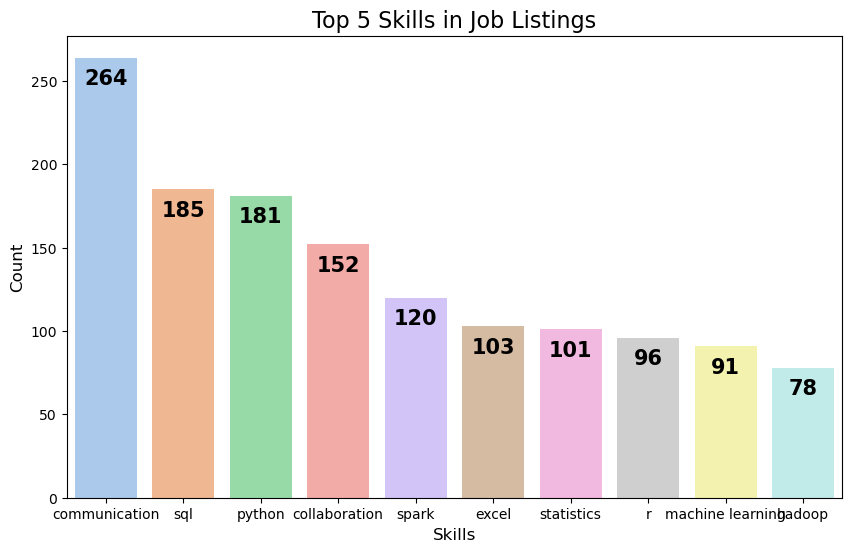

In [91]:
skill_df = skill_counts.reset_index()
skill_df.columns = ['skill', 'count']

plt.figure(figsize=(10, 6))
ax=sns.barplot(x='skill', y='count', data=skill_df, palette='pastel', hue='skill')
plt.title('Top 5 Skills in Job Listings',fontsize=16)
plt.xlabel('Skills',fontsize=12)
plt.ylabel('Count',fontsize=12)
for p in ax.patches: 
    height = p.get_height() 
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                fontsize=15, fontweight='bold',ha='center', va='center', 
                xytext=(0,-15), textcoords='offset points')
plt.show()


**Permintaan Tinggi untuk Keterampilan Data dan Teknologi**:
- Ada permintaan yang sangat tinggi untuk keterampilan di bidang data dan teknologi. Keterampilan teknis seperti SQL, Python, Spark,dll. serta keterampilan analitis seperti statistik dan machine learning, sangat diperlukan.

**Keterampilan Komunikasi dan Kolaborasi**: 
- Keterampilan teknis, kemampuan untuk berkomunikasi dan bekerja sama dengan tim juga sangat dihargai. Ini menunjukkan pentingnya keterampilan interpersonal di samping keterampilan teknis.